# Perceptron

## 1. Setup

In [1]:
%pip install ..[notebook] --quiet

Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
You should consider upgrading via the 'c:\Users\marti\Code\teaching-deeplearning\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
# Standard library imports
# n/a

# Third party imports
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Local application imports
from deeplearner.perceptron import Perceptron

## 2. Data

In [3]:
random_state = 500
n_features = 2  # The perceptron is designed for binary classification only

In [4]:
data, labels = make_classification(n_samples=250, n_features=n_features, n_informative=n_features, n_redundant=0, n_classes=2, random_state=random_state)

In [5]:
def plot_data(x, y, c, size: int = 10, figsize: tuple = (3, 3)):
    
    fig, _ = plt.subplots(nrows=1, ncols=1, figsize=figsize)

    fig.axes[0].scatter(x, y, c=c, s=size)

    plt.close()

    return fig

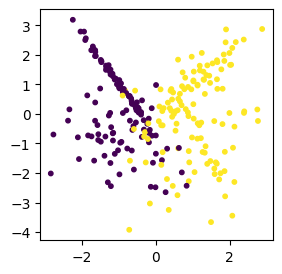

In [6]:
plot_data(x=[d[0] for d in data], y=[d[1] for d in data], c=labels, size=10)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=random_state)

## 3. Training the Perceptron

In [8]:
Neuron = Perceptron(n_inputs=2)

Neuron.train(X=X_train.tolist(), y=y_train.tolist())

## 4. Evaluating the Perceptron

In [9]:
y_predict = Neuron.predict(X=X_test.tolist())

In [10]:
def plot_evaluation(X_test, y_test, y_predict, size: int = 20, figsize: tuple = (12, 4), plot_boundary: bool = True):
  
    # Create subplots    
    fig, _ = plt.subplots(nrows=1, ncols=3, figsize=figsize)

    # Add title
    fig.suptitle("Perceptron: Test data", size=18)

    # The bounding box that the subplots will be fit inside
    fig.tight_layout(rect=[0.1, 0.1, 0.9, 0.95])

    # Extract x and y corrdiantes from data
    x = X_test[:, 0]
    y = X_test[:, 1]

    # Prediction
    mask = np.array([p == 1 for p in y_predict])
    fig.axes[0].scatter(x=x[mask], y=y[mask], marker=".", s=size, c="#1A85FF", label="Class A")
    fig.axes[0].scatter(x=x[~mask], y=y[~mask], marker="x", s=size,  c="#D41159", label="Class B")
    fig.axes[0].set_title("Prediction")

    # Truth 
    mask = np.array([p == 1 for p in y_test])
    fig.axes[1].scatter(x=x[mask], y=y[mask], marker=".", s=size, c="#1A85FF", label="Class A")
    fig.axes[1].scatter(x=x[~mask], y=y[~mask], marker="x", s=size,  c="#D41159", label="Class B")
    fig.axes[1].set_title("Truth")

    # Truth vs. prediction
    mask = np.array([truth == prediction for truth, prediction in zip(y_test, y_predict)])
    fig.axes[2].scatter(x=x[mask], y=y[mask], marker=".", s=size, c="#000000", label="Correct")
    fig.axes[2].scatter(x=x[~mask], y=y[~mask], marker="x", s=size, c="#DC3220", label="Incorrect")
    fig.axes[2].set_title("Prediction vs. Truth")      

    # Turn off ticks and labels
    for ax in fig.axes:

        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    # Plot boundary prediction
    if plot_boundary:

        x_min, x_max = fig.axes[0].get_xlim()
        x_line = np.linspace(x_min, x_max, num=100)
        y_line = Neuron.get_boundary(X=x_line.tolist())

        for ax in fig.axes:

          ax.plot(x_line, y_line, c="lightgray", label="Prediction")

    # Legends
    for ax in fig.axes:
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05))

    plt.close()

    return fig

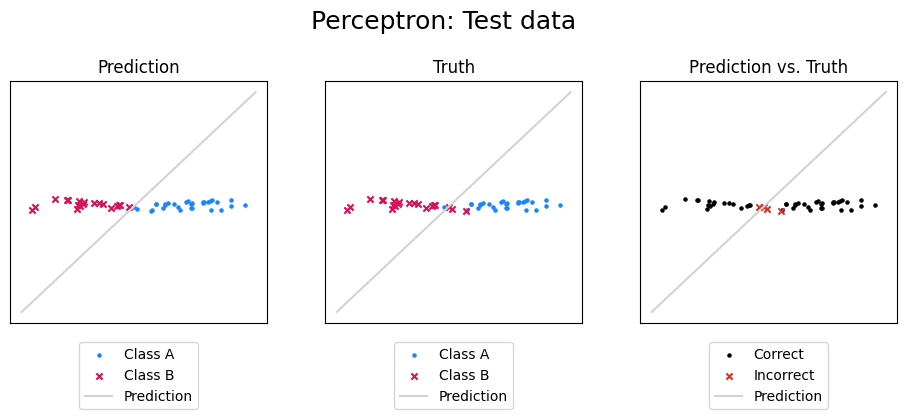

In [11]:
plot_evaluation(X_test=X_test, y_test=y_test, y_predict=y_predict)